In [1]:
import intake
catalog = intake.cat.access_nri
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import IPython.display
import cmocean as cm
import gsw

from dask.distributed import Client

import sys, os

os.chdir(os.path.join(os.getcwd(), "ACCESS-OM2-updated/figures/PV_slices"))
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

exptdict = exptdata.exptdict

# # Lists of models, experiments dirs and descriptors in consistent order

# models    = [exptdict[k]['model']   for k in exptdict.keys()]

# expts     = [exptdict[k]['expt']    for k in exptdict.keys()]

# exptdirs  = [exptdict[k]['exptdir'] for k in exptdict.keys()]

# descs     = [exptdict[k]['desc']    for k in exptdict.keys()]

# def model_expt_exptdir_desc(keyname):
#     """
#     Return (model, expt, exptdir, desc) strings for keyname in exptdict.keys()
    
#     Examples:
    
#     (model, expt, exptdir, desc) = model_expt_exptdir_desc('1deg')
    
#     for k in exptdict.keys():
#         (model, expt, exptdir, desc) = model_expt_exptdir_desc(k)
    
#     """
#     return (exptdict[keyname]['model'],
#             exptdict[keyname]['expt'],
#             exptdict[keyname]['exptdir'],
#             exptdict[keyname]['desc'])

# use common start and end dates for all climatologies
clim_tstart = exptdata.clim_tstart
clim_tend = exptdata.clim_tend

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
client=Client("tcp://10.6.43.39:8786")
client

<Client: 'tcp://10.6.122.47:8786' processes=1 threads=28, memory=126.00 GiB>

In [4]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

In [5]:
%%time
ekey='01deg'
expt = exptdict[ekey]['expt']
n_files = exptdict[ekey]['n_files']
time_units = exptdict[ekey]['time_units']
offset = exptdict[ekey]['offset']
cat_subset = catalog[expt]
var_search = cat_subset.search(variable='mld', frequency='1 daily')
darray = var_search.to_dask()
darray = darray['mld']
print(1)
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
mld_01deg = darray.sel(time=slice(clim_tstart,clim_tend)).sel(xt_ocean=-120.,method='nearest').compute()
cat_subset = catalog[expt]
var_search = cat_subset.search(variable='vert_pv')
darray = var_search.to_dask()
darray = darray['vert_pv']
print(2)
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
pv_01deg = darray.sel(time=slice(clim_tstart,clim_tend)).sel(xt_ocean=-120.,method='nearest').sel(st_ocean=slice(0,1500)).mean('time').compute()
cat_subset = catalog[expt]
var_search = cat_subset.search(variable='pot_rho_0')
darray = var_search.to_dask()
darray = darray['pot_rho_0']
print(3)
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
pot_rho_0_01deg = darray.sel(time=slice(clim_tstart,clim_tend)).sel(xt_ocean=-120.,method='nearest').sel(st_ocean=slice(0,1500)).mean('time').compute()

1
2
3
CPU times: user 47 s, sys: 4.32 s, total: 51.3 s
Wall time: 1h 5min 35s


In [6]:
#pot_rho_0_01deg=pot_tho_0_01deg
f = gsw.f(pot_rho_0_01deg.yt_ocean)
pv_01deg_norelvort = (pot_rho_0_01deg.diff(dim='st_ocean') / pot_rho_0_01deg.st_ocean.diff(dim='st_ocean')) / 1035. * f * 9.81

In [10]:
%%time
ekey='025deg'
expt = exptdict[ekey]['expt']
n_files = exptdict[ekey]['n_files']
time_units = exptdict[ekey]['time_units']
offset = exptdict[ekey]['offset']
cat_subset = catalog[expt]
var_search = cat_subset.search(variable='mld', frequency='1 daily')
darray = var_search.to_dask()
darray = darray['mld']
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
mld_025deg = darray.sel(time=slice(clim_tstart,clim_tend)).sel(xt_ocean=-120.,method='nearest').compute()
cat_subset = catalog[expt]
var_search = cat_subset.search(variable='pot_rho_0')
darray = var_search.to_dask()
darray = darray['pot_rho_0']
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
pot_rho_0_025deg = darray.sel(time=slice(clim_tstart,clim_tend)).sel(xt_ocean=-120.,method='nearest').sel(st_ocean=slice(0,1500)).mean('time').compute()
f = gsw.f(pot_rho_0_025deg.yt_ocean)
pv_025deg = (pot_rho_0_025deg.diff(dim='st_ocean') / pot_rho_0_025deg.st_ocean.diff(dim='st_ocean')) / 1035. * f * 9.81

CPU times: user 18.1 s, sys: 1.83 s, total: 19.9 s
Wall time: 14min 28s


In [12]:
%%time
ekey='1deg'
expt = exptdict[ekey]['expt']
n_files = exptdict[ekey]['n_files']
time_units = exptdict[ekey]['time_units']
offset = exptdict[ekey]['offset']
cat_subset = catalog[expt]
var_search = cat_subset.search(variable='mld', frequency='1 daily')
darray = var_search.to_dask()
darray = darray['mld']
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
mld_1deg = darray.sel(time=slice(clim_tstart,clim_tend)).sel(xt_ocean=-120.,method='nearest').compute()

cat_subset = catalog[expt]
var_search = cat_subset.search(variable='pot_rho_0')
darray = var_search.to_dask()
darray = darray['pot_rho_0']
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
pot_rho_0_1deg = darray.sel(time=slice(clim_tstart,clim_tend)).sel(xt_ocean=-120.,method='nearest').sel(st_ocean=slice(0,1500)).mean('time').compute()
f = gsw.f(pot_rho_0_1deg.yt_ocean)
pv_1deg = (pot_rho_0_1deg.diff(dim='st_ocean') / pot_rho_0_1deg.st_ocean.diff(dim='st_ocean')) / 1035 * f * 9.81

CPU times: user 9.45 s, sys: 792 ms, total: 10.2 s
Wall time: 3min 38s


In [13]:
mld_1deg

<xarray.DataArray 'mld' (time: 9131, yt_ocean: 300)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    xt_ocean  float64 -119.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * time      (time) datetime64[ns] 1993-01-01T12:00:00 ... 2017-12-31T12:00:00
Attributes:
    long_name:      mixed layer depth determined by density criteria
    units:          m
    valid_range:    [      0. 1000000.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  ocean_mixed_layer_thickness_defined_by_sigma_t
    ncfiles:        ['/g/data/hh5/tmp/cosima/access-om2/1deg_jra55v13_iaf_spi...
    contact:        Abhishek Savita
    email:          Abhishek.Savita@csiro.au
    created:        2019-04-12
    description:    1 degree ACCESS-OM2 global model configuration under inte...
    notes:          Source code: https://github.com/COSIMA/access-om2/release...

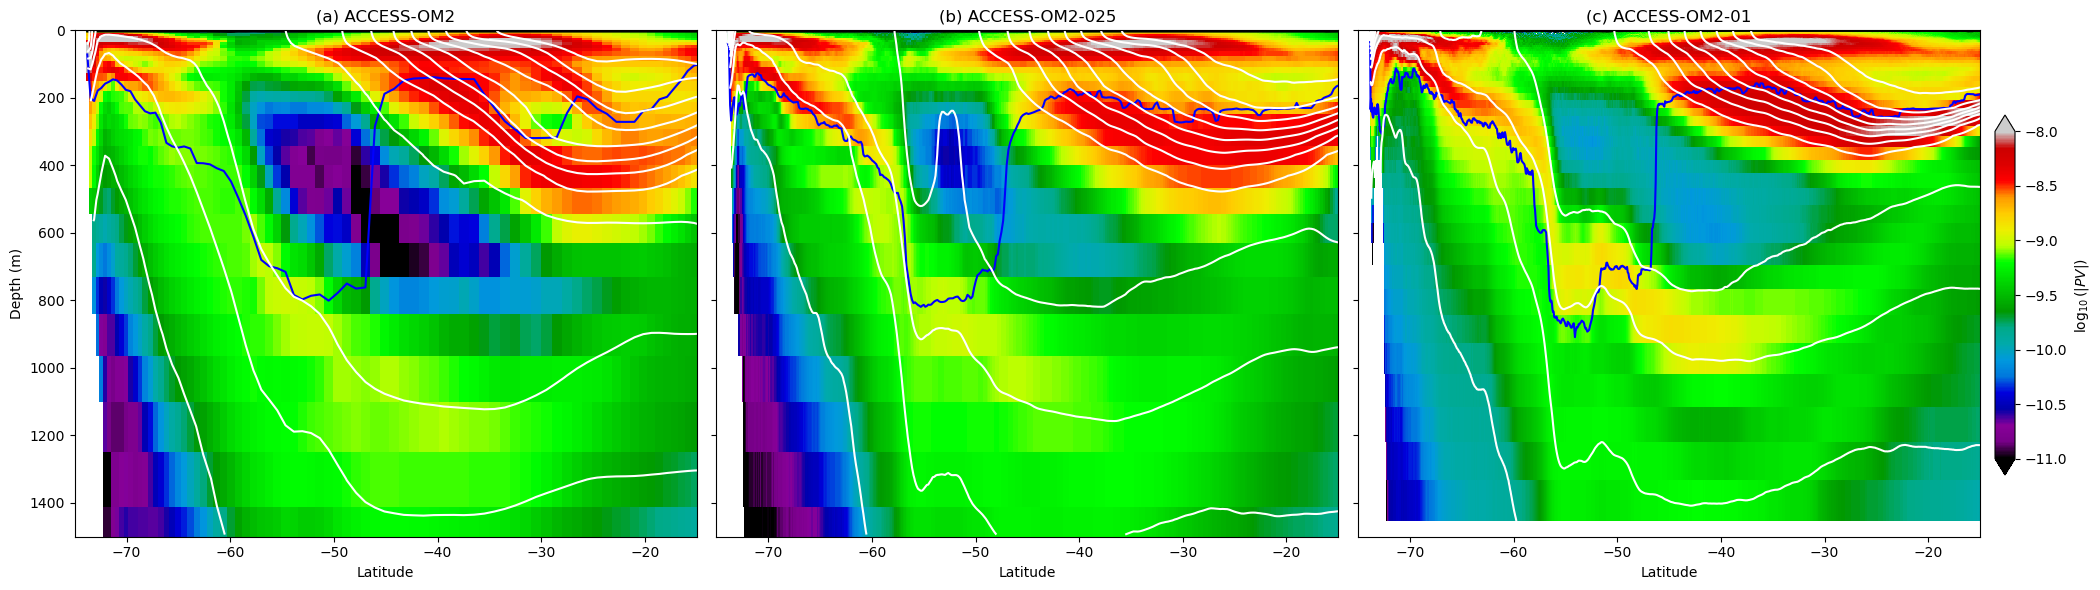

In [23]:
clev=np.arange(1025,1028.5,0.25)
cmp = plt.get_cmap('nipy_spectral')  # was jet

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
p1 = plt.pcolormesh(pv_1deg.yt_ocean,pv_1deg.st_ocean,np.log10(-pv_1deg),cmap=cmp)#,extend='both')
plt.plot(mld_1deg.yt_ocean,mld_1deg.max(axis=0),color='b')
plt.plot(mld_1deg.yt_ocean,mld_1deg.min(axis=0),color='k')
plt.clim(-11,-8.0)
# plt.colorbar()
CS = plt.contour(pot_rho_0_1deg.yt_ocean,pot_rho_0_1deg.st_ocean,pot_rho_0_1deg,levels=clev,colors='w')
# plt.clabel(CS)
plt.xlim([-75,-15])
plt.ylim([0,1500])
plt.xlabel('Latitude')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()
plt.title('(a) ACCESS-OM2')

plt.subplot(1,3,2)
plt.pcolormesh(pv_025deg.yt_ocean,pv_025deg.st_ocean,np.log10(-pv_025deg),cmap=cmp)#,extend='both')
plt.clim(-11,-8.0)
# plt.colorbar()
plt.plot(mld_025deg.yt_ocean,mld_025deg.max(axis=0),color='b')
plt.plot(mld_025deg.yt_ocean,mld_025deg.min(axis=0),color='k')
CS = plt.contour(pot_rho_0_025deg.yt_ocean,pot_rho_0_025deg.st_ocean,pot_rho_0_025deg,levels=clev,colors='w')
# plt.clabel(CS)
plt.xlim([-75,-15])
plt.ylim([0,1500])
plt.xlabel('Latitude')
# plt.ylabel('Depth (m)')
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().invert_yaxis()
plt.title('(b) ACCESS-OM2-025')

plt.subplot(1,3,3)
plt.pcolormesh(pv_01deg.yt_ocean,pv_01deg.st_ocean,
               np.log10(-pv_01deg_norelvort)[:, :-1], # dimension mismatch, removing last value.
               cmap=cmp)#,extend='both')
plt.plot(mld_01deg.yt_ocean,mld_01deg.max(axis=0),color='b')
plt.plot(mld_01deg.yt_ocean,mld_01deg.min(axis=0),color='k')
plt.clim(-11,-8.0)
# plt.colorbar()
CS=plt.contour(pot_rho_0_01deg.yt_ocean,pot_rho_0_01deg.st_ocean,pot_rho_0_01deg,levels=clev,colors='w')
# plt.clabel(CS)
plt.xlim([-75,-15])
plt.ylim([0,1500])
plt.xlabel('Latitude')
# plt.ylabel('Depth (m)')
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().invert_yaxis()
plt.title('(c) ACCESS-OM2-01')

#plt.subplot(1,3,3)
#plt.pcolormesh(pv_01deg.yt_ocean,pv_01deg.st_ocean,np.log10(-pv_01deg),cmap=cmp)
#plt.plot(mld_01deg.yt_ocean,mld_01deg.max(axis=0))
#plt.plot(mld_01deg.yt_ocean,mld_01deg.min(axis=0))
#plt.clim(-11,-8.5)
#plt.colorbar()
#CS=plt.contour(pot_rho_0_01deg.yt_ocean,pot_rho_0_01deg.st_ocean,pot_rho_0_01deg,levels=clev,colors='k')
#plt.clabel(CS)
#plt.xlim([-75,-15])
#plt.ylim([0,1500])
#plt.xlabel('Latitude')
#plt.ylabel('Depth [m]')
#plt.gca().invert_yaxis()
#plt.title('(c) ACCESS-OM2-01')

ax3 = plt.axes([1.0,0.2,0.01,0.6])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',extend='both')
cb.ax.set_ylabel('$\log_{10}(|PV|)$')

plt.tight_layout()

savefigure('PV_slice_comparison')